#Proyecto 1 - Productividad en manufactura
1. Tarea 1: Preguntas de negocio y plan de accion 
2. Tarea 2: Limpieza y alistamiento de datos
2.1 Carga de los datos
2.2 Columnas y filas
2.3 Verificacion de tipos
2.4 Columnas
2.5 Entendimiento: Analisis de completitud
3. Tarea 3: Exploracion de datos
3.1 Analisis datos numéricos
3.2 Analisis variables categóricos/cualitativas
3.3 Búsqueda de relaciones con la variable objetivo
3.4 Preparación de datos: Arreglo nulos y Datos atipicos
4. Tarea 4: Modelamiento
4.1 Particionamiento del conjunto de datos en entrenamiento y prueba
4.2 Entrenamiento de un primer modelo de regresión lineal
4.3 Entrenamiento de un segundo modelo aplicando normalización
4.4 Validación de los supuestos de la regresión
5. Tarea 5:Diseno y desarrollo del tablero
6. Tarea 6 - Despliegue


In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import scipy.stats as stats

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/4257810315.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

## Tarea 2: Limpieza y alistamiento de datos

### 2.1. Carga de datos

In [41]:
data_df = pd.read_csv("data.txt", sep=',')
data_df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


### 2.2 Columnas y filas

In [42]:
#Columnas y Filas
data_df.shape

(1197, 15)

### 2.3 Verificacion de tipos

In [43]:
#Verificación de tipos
data_df.dtypes

date                      object
quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object

### 2.4 Columnas

In [33]:
#Columnas
data_df.columns
features = ["date", "quarter", "department", "day", "team", "targeted_productivity", "smv", "wip", "over_time", "incentive", "idle_time", "idle_men", "no_of_style_change", "no_of_workers"]

### 2.5 Análisis de completitud

Análisis de completitud:A continuación, se revisa la completitud de los datos proporcionados. Es por eso que, se hace una revisión del porcentaje de valores nulos (vacíos) en las características seleccionadas para la regresión.

In [ ]:
#Análisis de completitud
(data_df.isnull().sum() / data_df.shape[0]).sort_values(ascending = False)
#PROBLEMA: Completitud

wip                      0.422723
date                     0.000000
quarter                  0.000000
department               0.000000
day                      0.000000
team                     0.000000
targeted_productivity    0.000000
smv                      0.000000
over_time                0.000000
incentive                0.000000
idle_time                0.000000
idle_men                 0.000000
no_of_style_change       0.000000
no_of_workers            0.000000
actual_productivity      0.000000
dtype: float64

## Tarea 3: Exploracion de datos

### 3.1 Análisis datos numéricos


count    1197.000000
mean        6.426901
std         3.463963
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        12.000000
Name: team, dtype: float64


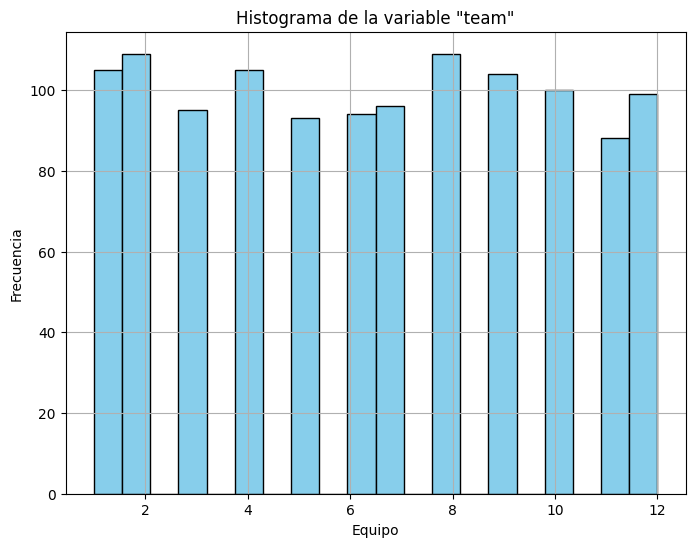

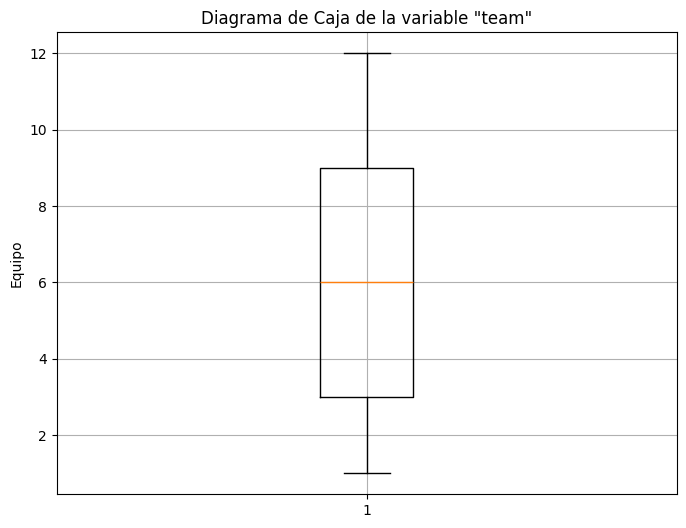

In [44]:
# Descripción de la variable 'team'
team_description = data_df['team'].describe()
print(team_description)

# Histograma de la variable 'team'
plt.figure(figsize=(8, 6))
plt.hist(data_df['team'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "team"')
plt.xlabel('Equipo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'team'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['team'])
plt.title('Diagrama de Caja de la variable "team"')
plt.ylabel('Equipo')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.729632
std         0.097891
min         0.070000
25%         0.700000
50%         0.750000
75%         0.800000
max         0.800000
Name: targeted_productivity, dtype: float64


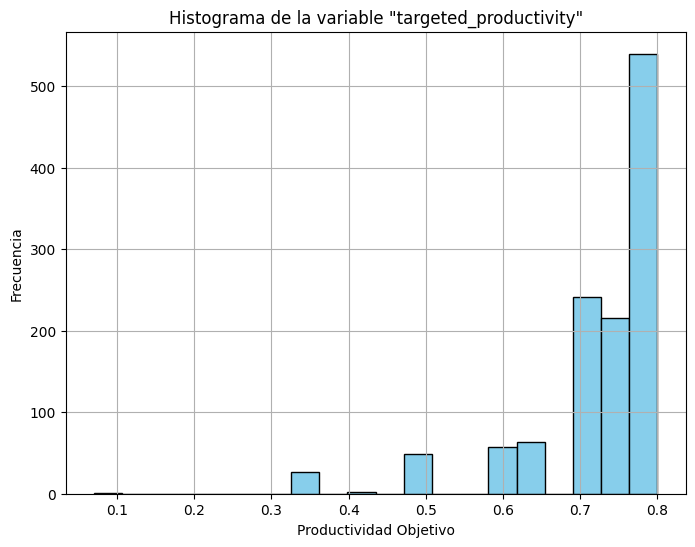

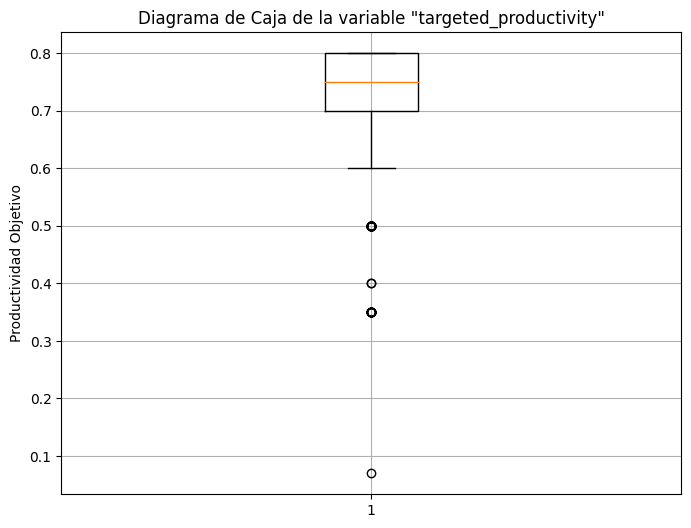

In [ ]:
# Descripción de la variable 'targeted_productivity'
targeted_productivity_description = data_df['targeted_productivity'].describe()
print(targeted_productivity_description)

# Histograma de la variable 'targeted_productivity'
plt.figure(figsize=(8, 6))
plt.hist(data_df['targeted_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "targeted_productivity"')
plt.xlabel('Productividad Objetivo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'targeted_productivity'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['targeted_productivity'])
plt.title('Diagrama de Caja de la variable "targeted_productivity"')
plt.ylabel('Productividad Objetivo')
plt.grid(True)
plt.show()

count    1197.000000
mean       15.062172
std        10.943219
min         2.900000
25%         3.940000
50%        15.260000
75%        24.260000
max        54.560000
Name: smv, dtype: float64


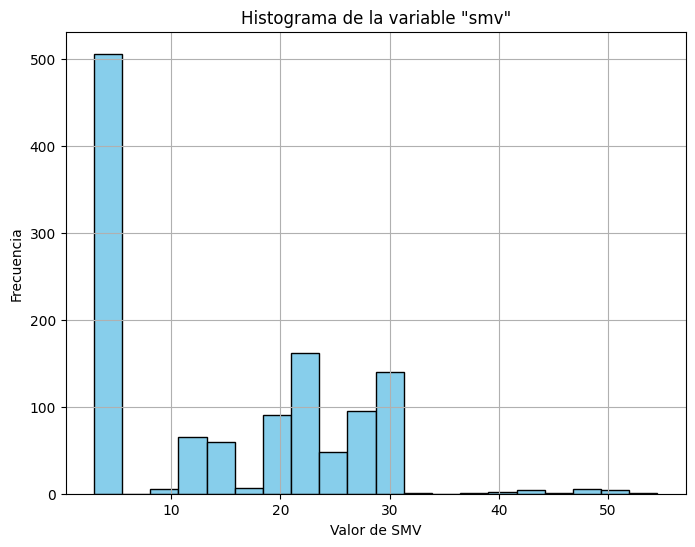

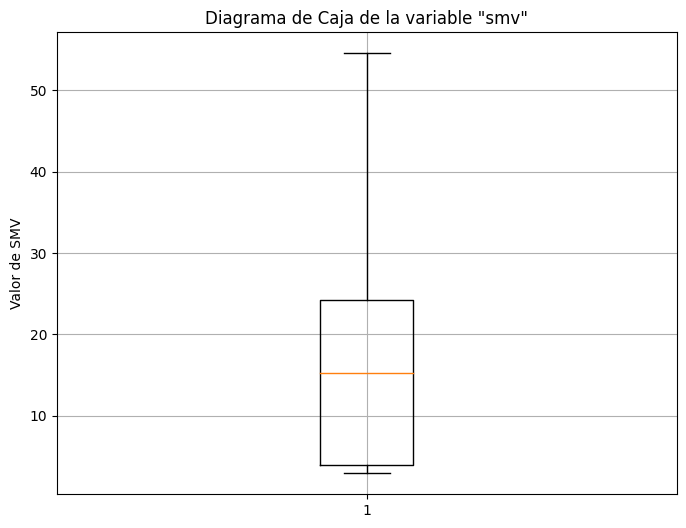

In [ ]:
# Descripción de la variable 'smv'
smv_description = data_df['smv'].describe()
print(smv_description)

# Histograma de la variable 'smv'
plt.figure(figsize=(8, 6))
plt.hist(data_df['smv'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "smv"')
plt.xlabel('Valor de SMV')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'smv'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['smv'])
plt.title('Diagrama de Caja de la variable "smv"')
plt.ylabel('Valor de SMV')
plt.grid(True)
plt.show()

count     1197.000000
mean      1190.465991
std       1395.647261
min          7.000000
25%        970.000000
50%       1190.465991
75%       1190.465991
max      23122.000000
Name: wip, dtype: float64


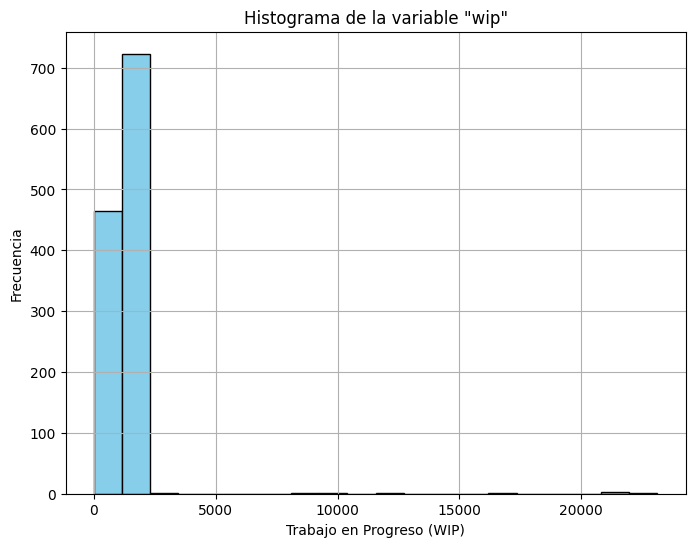

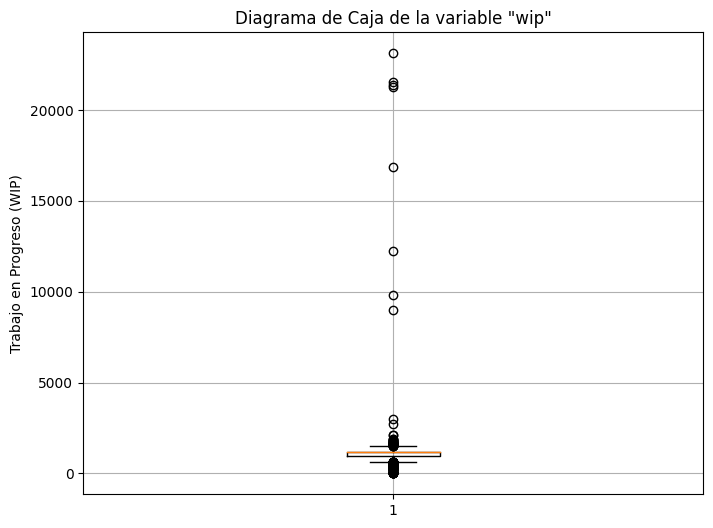

In [ ]:
# Descripción de la variable 'wip'
wip_description = data_df['wip'].describe()
print(wip_description)

# Histograma de la variable 'wip'
plt.figure(figsize=(8, 6))
plt.hist(data_df['wip'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "wip"')
plt.xlabel('Trabajo en Progreso (WIP)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'wip'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['wip'])
plt.title('Diagrama de Caja de la variable "wip"')
plt.ylabel('Trabajo en Progreso (WIP)')
plt.grid(True)
plt.show()

count     1197.000000
mean      4567.460317
std       3348.823563
min          0.000000
25%       1440.000000
50%       3960.000000
75%       6960.000000
max      25920.000000
Name: over_time, dtype: float64


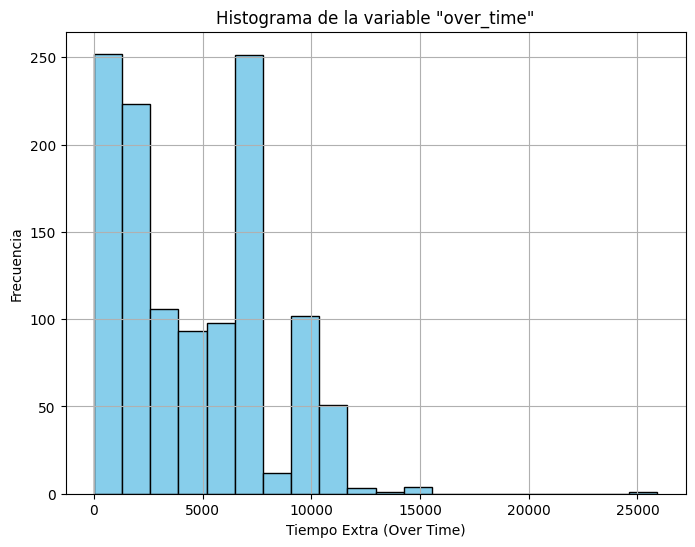

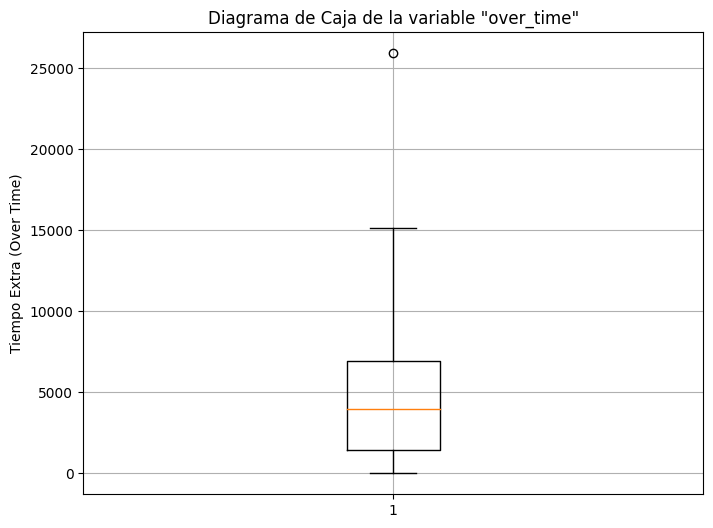

In [ ]:
# Descripción de la variable 'over_time'
over_time_description = data_df['over_time'].describe()
print(over_time_description)

# Histograma de la variable 'over_time'
plt.figure(figsize=(8, 6))
plt.hist(data_df['over_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "over_time"')
plt.xlabel('Tiempo Extra (Over Time)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'over_time'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['over_time'])
plt.title('Diagrama de Caja de la variable "over_time"')
plt.ylabel('Tiempo Extra (Over Time)')
plt.grid(True)
plt.show()

count    1197.000000
mean       38.210526
std       160.182643
min         0.000000
25%         0.000000
50%         0.000000
75%        50.000000
max      3600.000000
Name: incentive, dtype: float64


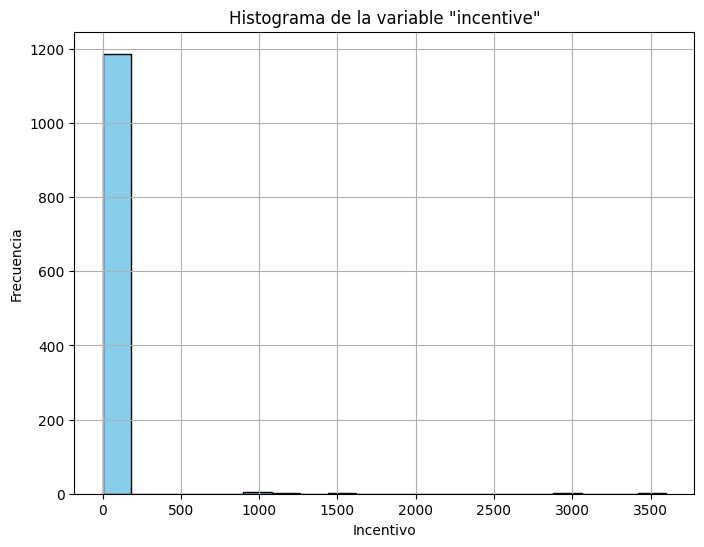

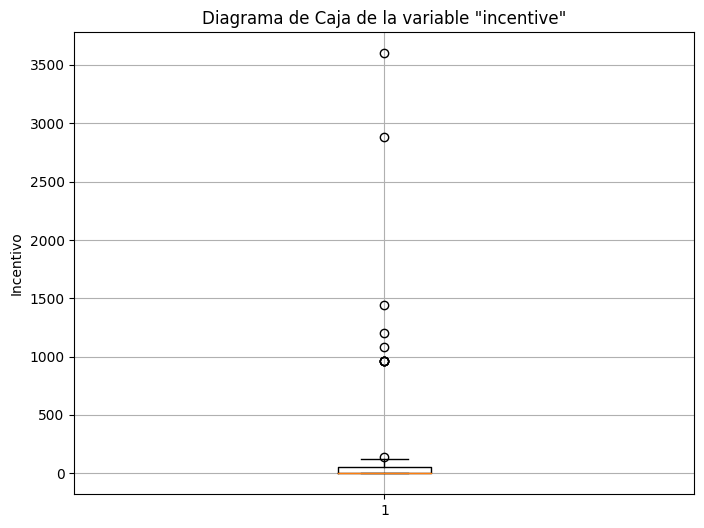

In [ ]:
# Descripción de la variable 'incentive'
incentive_description = data_df['incentive'].describe()
print(incentive_description)

# Histograma de la variable 'incentive'
plt.figure(figsize=(8, 6))
plt.hist(data_df['incentive'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "incentive"')
plt.xlabel('Incentivo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'incentive'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['incentive'])
plt.title('Diagrama de Caja de la variable "incentive"')
plt.ylabel('Incentivo')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.730159
std        12.709757
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       300.000000
Name: idle_time, dtype: float64


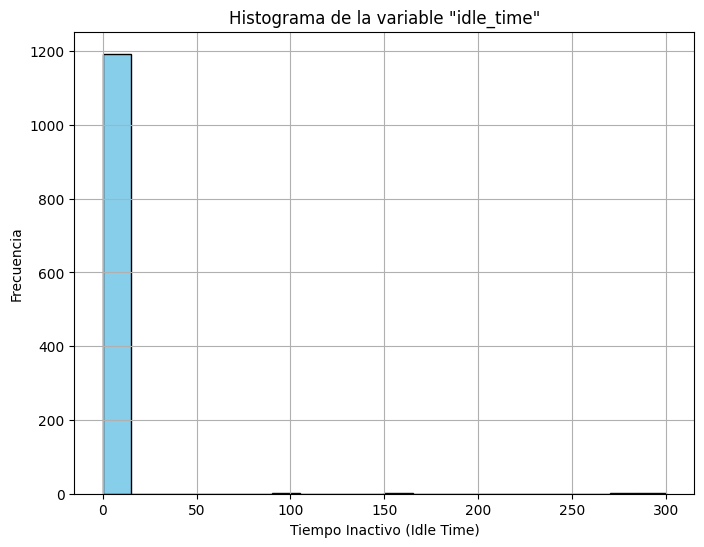

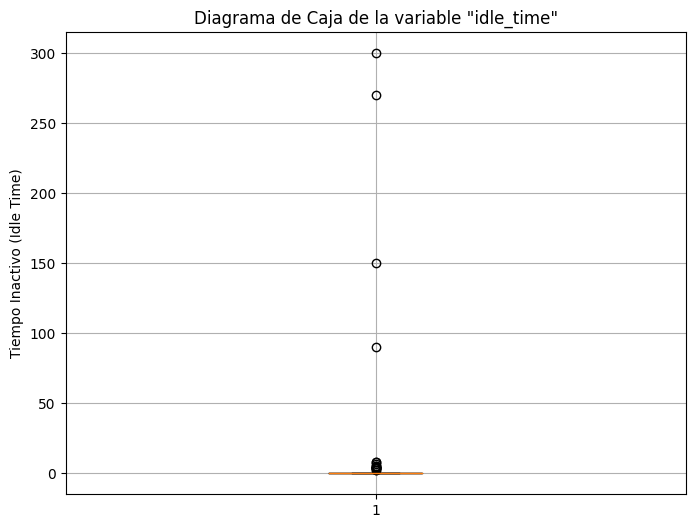

In [ ]:
# Descripción de la variable 'idle_time'
idle_time_description = data_df['idle_time'].describe()
print(idle_time_description)

# Histograma de la variable 'idle_time'
plt.figure(figsize=(8, 6))
plt.hist(data_df['idle_time'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "idle_time"')
plt.xlabel('Tiempo Inactivo (Idle Time)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'idle_time'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['idle_time'])
plt.title('Diagrama de Caja de la variable "idle_time"')
plt.ylabel('Tiempo Inactivo (Idle Time)')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.369256
std         3.268987
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        45.000000
Name: idle_men, dtype: float64


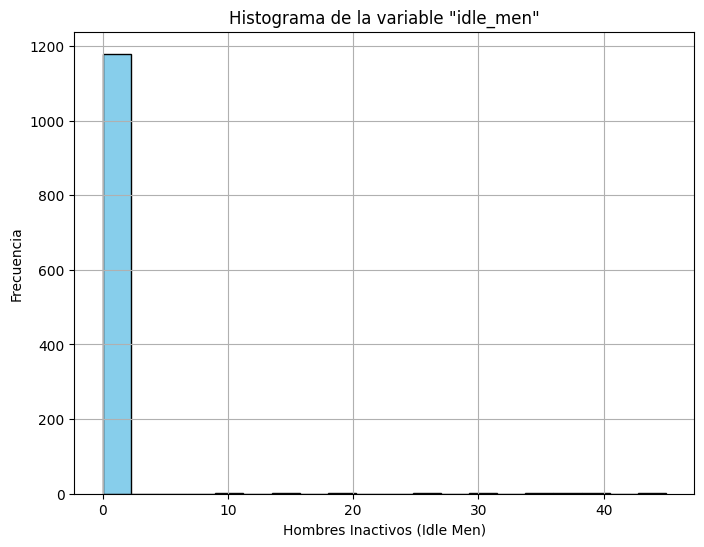

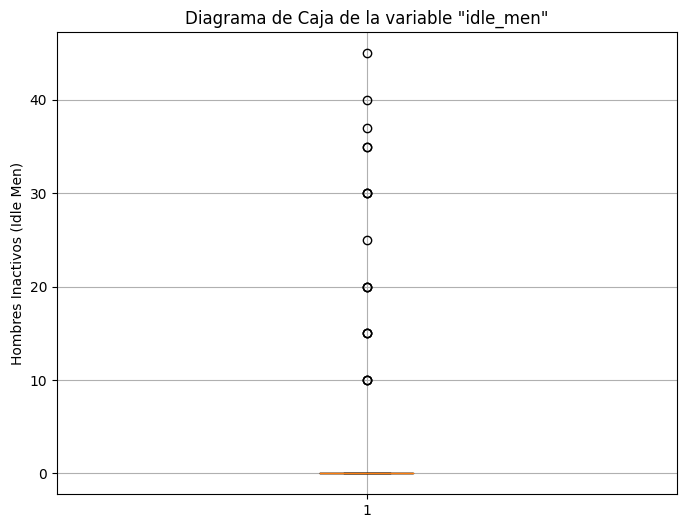

In [ ]:
# Descripción de la variable 'idle_men'
idle_men_description = data_df['idle_men'].describe()
print(idle_men_description)

# Histograma de la variable 'idle_men'
plt.figure(figsize=(8, 6))
plt.hist(data_df['idle_men'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "idle_men"')
plt.xlabel('Hombres Inactivos (Idle Men)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'idle_men'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['idle_men'])
plt.title('Diagrama de Caja de la variable "idle_men"')
plt.ylabel('Hombres Inactivos (Idle Men)')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.150376
std         0.427848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.000000
Name: no_of_style_change, dtype: float64


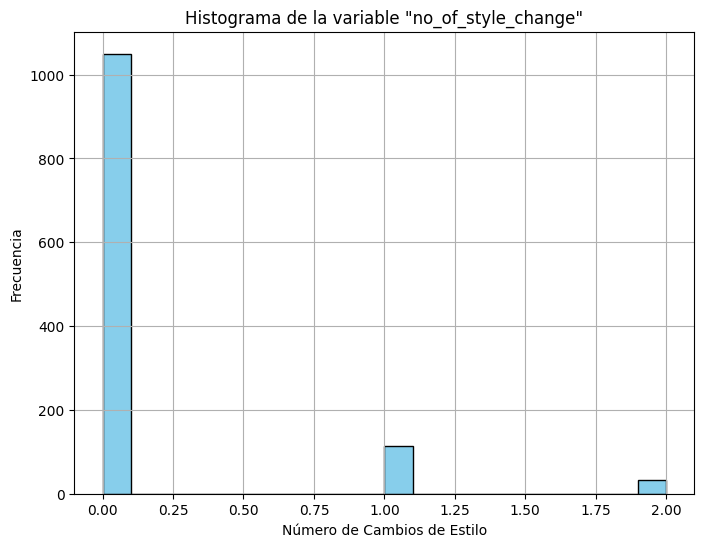

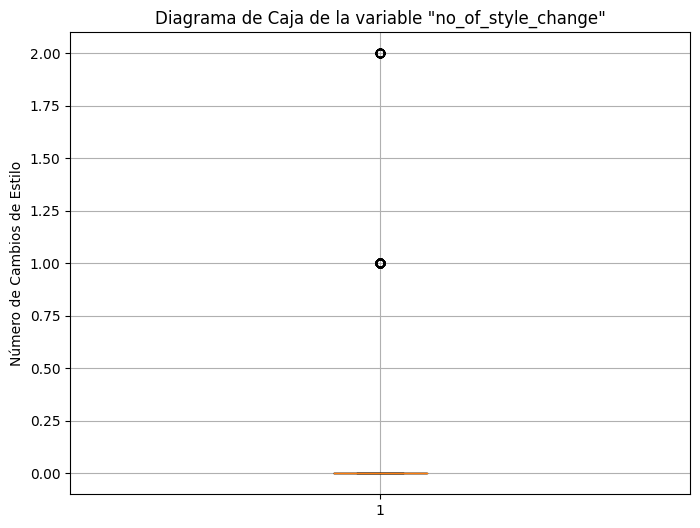

In [ ]:
# Descripción de la variable 'no_of_style_change'
no_of_style_change_description = data_df['no_of_style_change'].describe()
print(no_of_style_change_description)

# Histograma de la variable 'no_of_style_change'
plt.figure(figsize=(8, 6))
plt.hist(data_df['no_of_style_change'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "no_of_style_change"')
plt.xlabel('Número de Cambios de Estilo')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'no_of_style_change'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['no_of_style_change'])
plt.title('Diagrama de Caja de la variable "no_of_style_change"')
plt.ylabel('Número de Cambios de Estilo')
plt.grid(True)
plt.show()

count    1197.000000
mean       34.609858
std        22.197687
min         2.000000
25%         9.000000
50%        34.000000
75%        57.000000
max        89.000000
Name: no_of_workers, dtype: float64


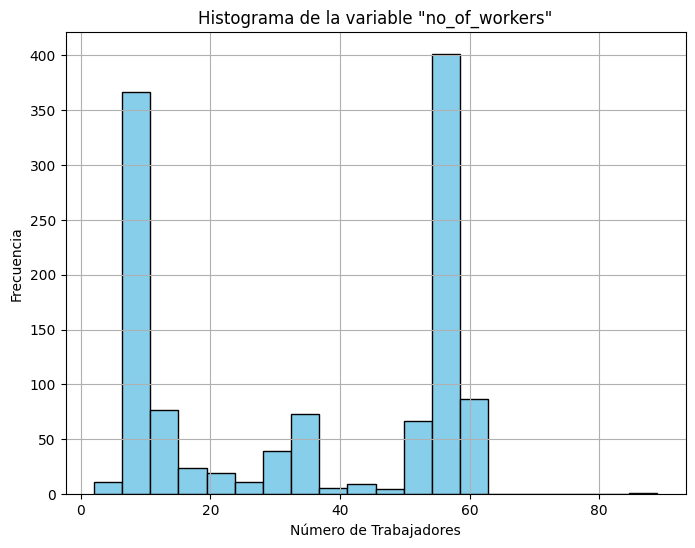

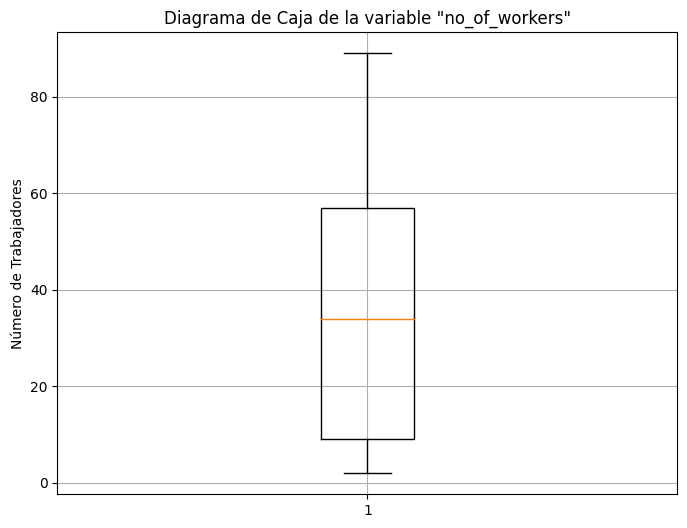

In [ ]:
# Descripción de la variable 'no_of_workers'
no_of_workers_description = data_df['no_of_workers'].describe()
print(no_of_workers_description)

# Histograma de la variable 'no_of_workers'
plt.figure(figsize=(8, 6))
plt.hist(data_df['no_of_workers'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "no_of_workers"')
plt.xlabel('Número de Trabajadores')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'no_of_workers'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['no_of_workers'])
plt.title('Diagrama de Caja de la variable "no_of_workers"')
plt.ylabel('Número de Trabajadores')
plt.grid(True)
plt.show()

count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64


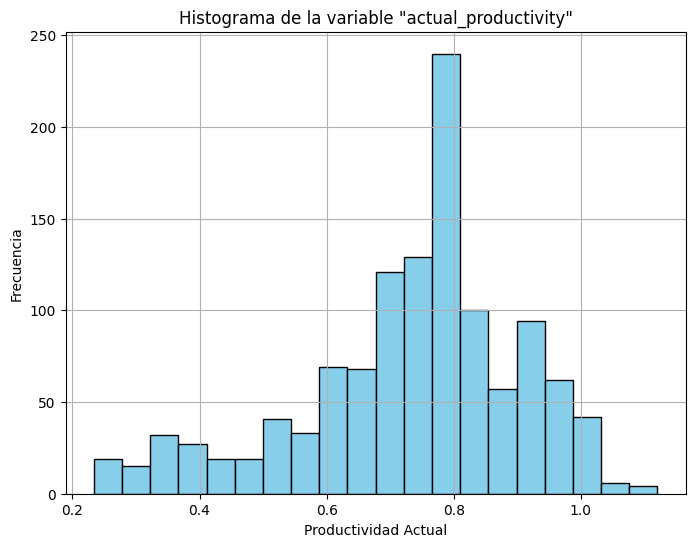

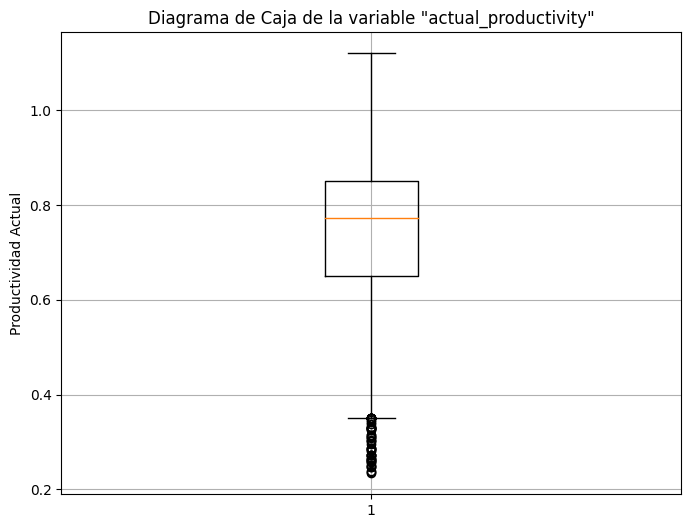

In [ ]:
# Descripción de la variable 'actual_productivity'
actual_productivity_description = data_df['actual_productivity'].describe()
print(actual_productivity_description)

# Histograma de la variable 'actual_productivity'
plt.figure(figsize=(8, 6))
plt.hist(data_df['actual_productivity'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de la variable "actual_productivity"')
plt.xlabel('Productividad Actual')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Boxplot de la variable 'actual_productivity'
plt.figure(figsize=(8, 6))
plt.boxplot(data_df['actual_productivity'])
plt.title('Diagrama de Caja de la variable "actual_productivity"')
plt.ylabel('Productividad Actual')
plt.grid(True)
plt.show()

### 3.2 Análisis datos categóricos



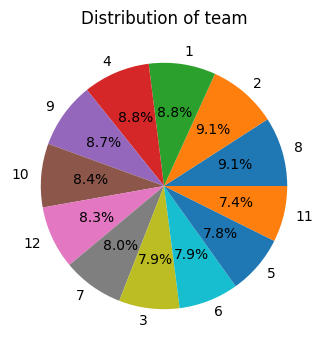

In [45]:
data_df['team'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of team')
plt.ylabel('')
plt.show()


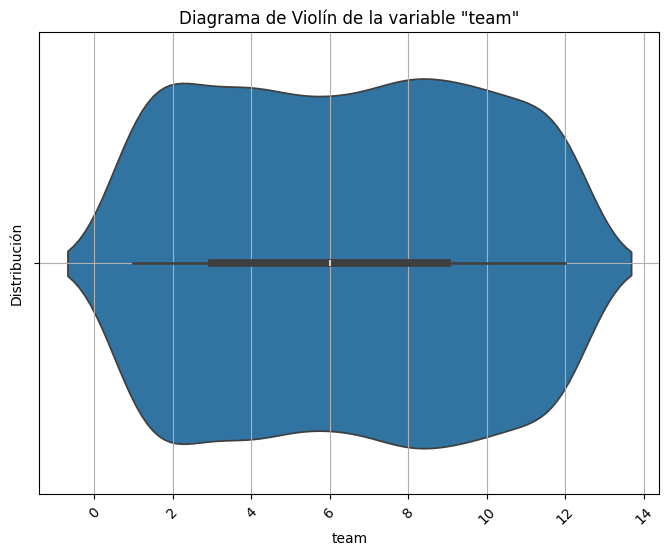

    team  Frecuencia
0      8         109
1      2         109
2      1         105
3      4         105
4      9         104
5     10         100
6     12          99
7      7          96
8      3          95
9      6          94
10     5          93
11    11          88


/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/3450353254.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='team', data=data_df, palette='viridis', order = data_df['team'].value_counts().index)


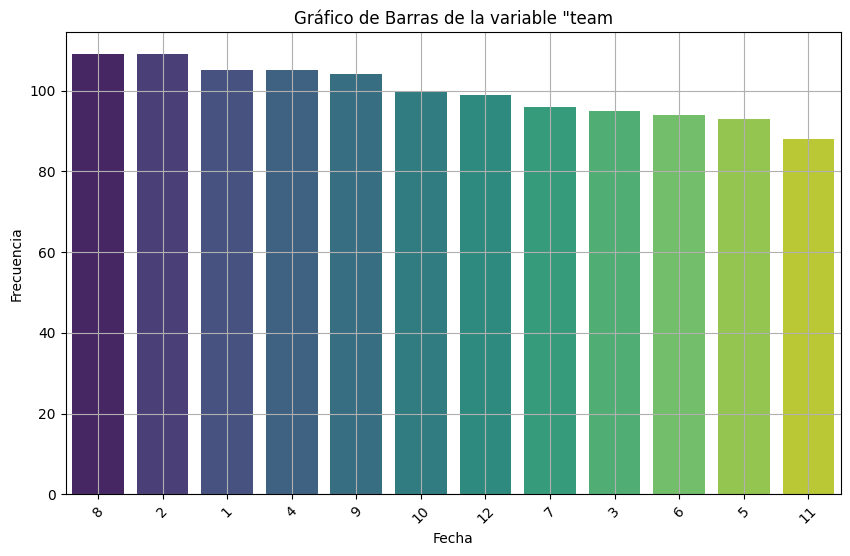

In [23]:
# Diagrama de Violín de la variable 'team'
plt.figure(figsize=(8, 6))
sns.violinplot(x='team', data=data_df)
plt.title('Diagrama de Violín de la variable "team"')
plt.xlabel('team')
plt.ylabel('Distribución')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'team'
date_frequency_table = data_df['team'].value_counts().reset_index()
date_frequency_table.columns = ['team', 'Frecuencia']
print(date_frequency_table)

# Gráfico de Barras de la variable 'team'
plt.figure(figsize=(10, 6))
sns.countplot(x='team', data=data_df, palette='viridis', order = data_df['team'].value_counts().index)
plt.title('Gráfico de Barras de la variable "team')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

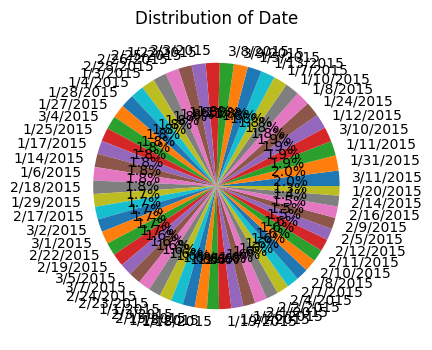

In [ ]:
data_df['date'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of Date')
plt.ylabel('')
plt.show()

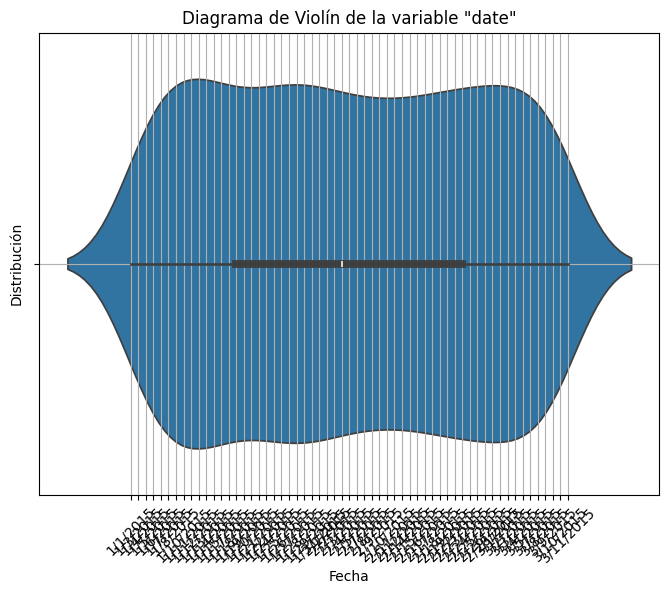

        Fecha  Frecuencia
0   3/11/2015          24
1   1/31/2015          24
2   1/11/2015          23
3   3/10/2015          23
4   1/12/2015          23
..        ...         ...
54   2/5/2015          18
55   2/9/2015          18
56  2/16/2015          18
57  2/14/2015          17
58  1/20/2015          15

[59 rows x 2 columns]


<ipython-input-48-f227363d98dc>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='date', data=data_df, palette='viridis', order = data_df['date'].value_counts().index)


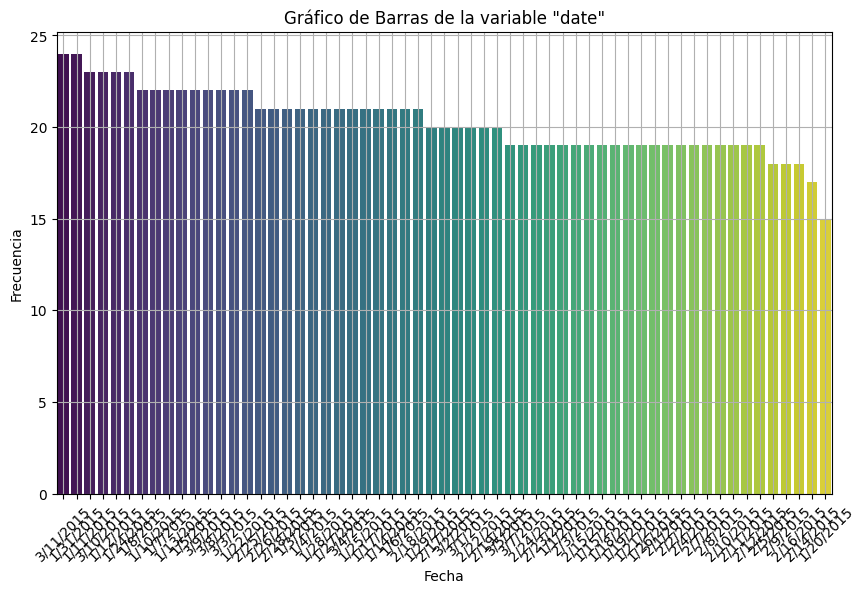

In [ ]:
# Diagrama de Violín de la variable 'date'
plt.figure(figsize=(8, 6))
sns.violinplot(x='date', data=data_df)
plt.title('Diagrama de Violín de la variable "date"')
plt.xlabel('Fecha')
plt.ylabel('Distribución')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'date'
date_frequency_table = data_df['date'].value_counts().reset_index()
date_frequency_table.columns = ['Fecha', 'Frecuencia']
print(date_frequency_table)

# Gráfico de Barras de la variable 'date'
plt.figure(figsize=(10, 6))
sns.countplot(x='date', data=data_df, palette='viridis', order = data_df['date'].value_counts().index)
plt.title('Gráfico de Barras de la variable "date"')
plt.xlabel('Fecha')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
unique_categories = data_df['date'].unique()
unique_categories.shape[0]

59

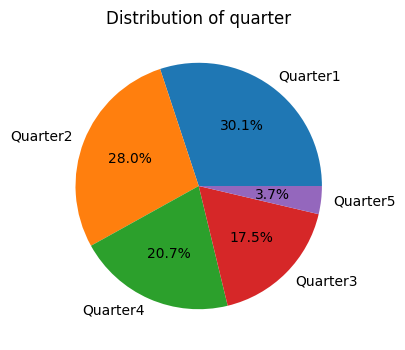

In [ ]:
data_df['quarter'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of quarter')
plt.ylabel('')
plt.show()

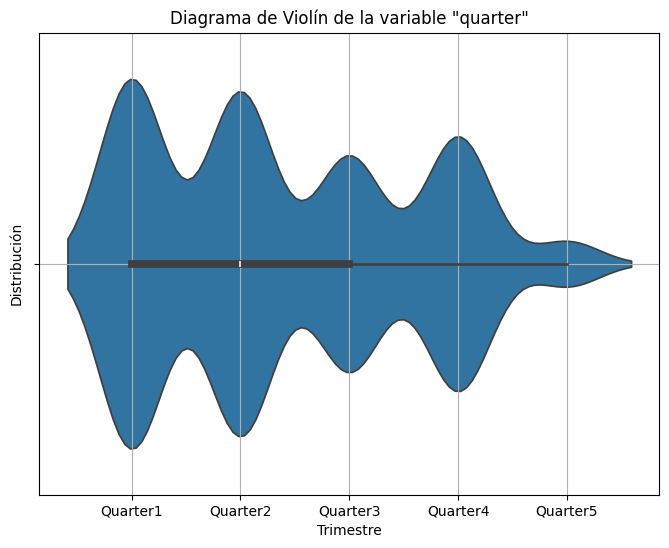

  Trimestre  Frecuencia
0  Quarter1         360
1  Quarter2         335
2  Quarter4         248
3  Quarter3         210
4  Quarter5          44


<ipython-input-50-d004f47b1d40>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='quarter', data=data_df, palette='viridis', order = data_df['quarter'].value_counts().index)


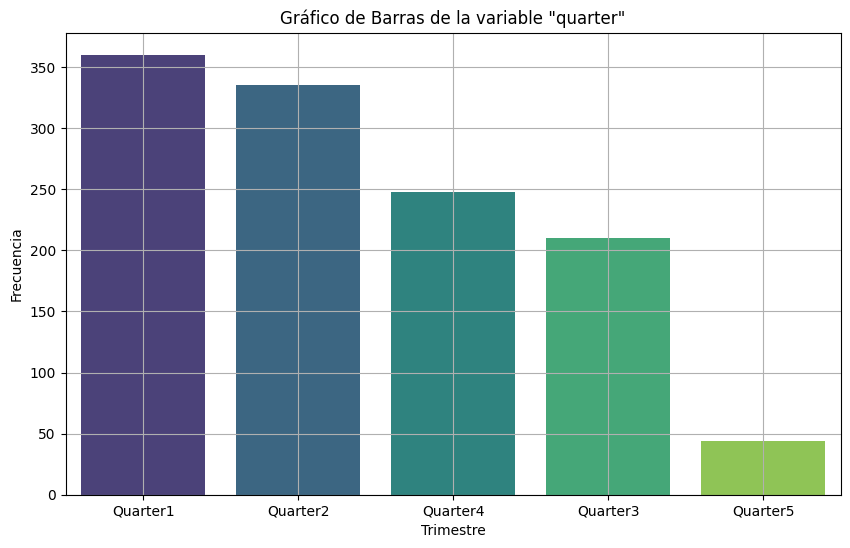

In [ ]:
# Diagrama de Violín de la variable 'quarter'
plt.figure(figsize=(8, 6))
sns.violinplot(x='quarter', data=data_df)
plt.title('Diagrama de Violín de la variable "quarter"')
plt.xlabel('Trimestre')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'quarter'
quarter_frequency_table = data_df['quarter'].value_counts().reset_index()
quarter_frequency_table.columns = ['Trimestre', 'Frecuencia']
print(quarter_frequency_table)

# Gráfico de Barras de la variable 'quarter'
plt.figure(figsize=(10, 6))
sns.countplot(x='quarter', data=data_df, palette='viridis', order = data_df['quarter'].value_counts().index)
plt.title('Gráfico de Barras de la variable "quarter"')
plt.xlabel('Trimestre')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
unique_categories = data_df['quarter'].unique()
unique_categories.shape[0]

5

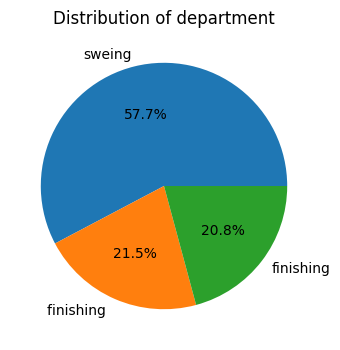

In [ ]:
data_df['department'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of department')
plt.ylabel('')
plt.show()

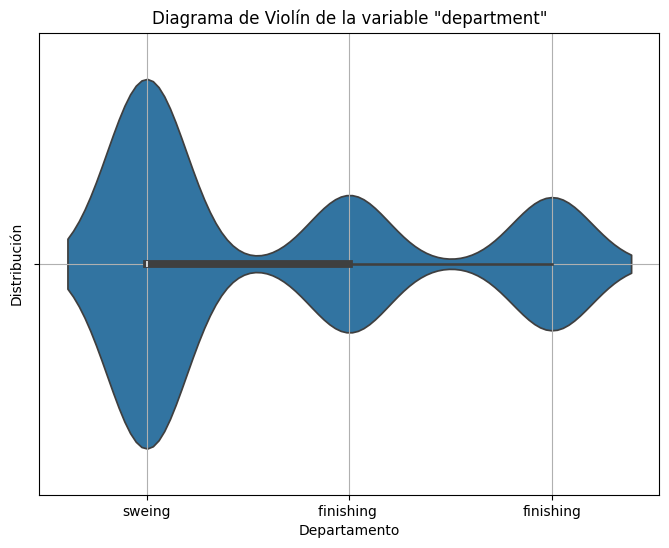

  Departamento  Frecuencia
0       sweing         691
1   finishing          257
2    finishing         249


<ipython-input-55-6b7535fe7cce>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='department', data=data_df, palette='viridis', order = data_df['department'].value_counts().index)


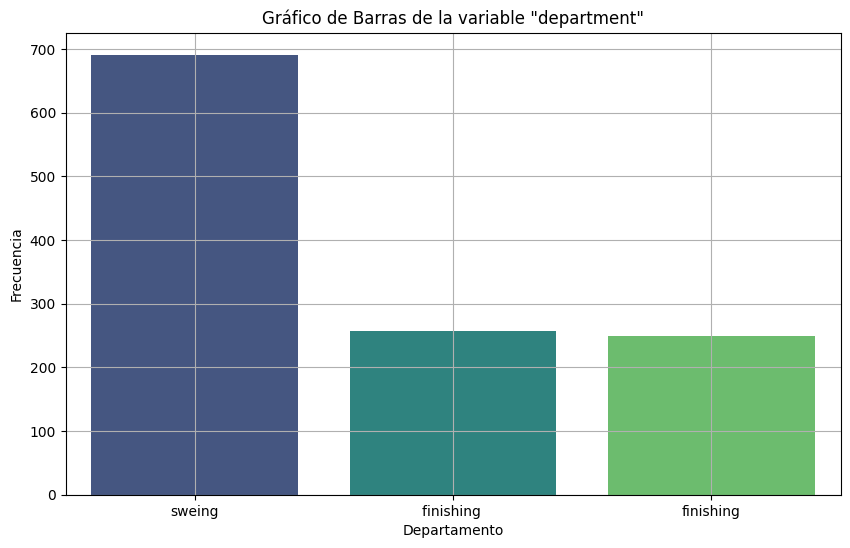

In [ ]:
# Diagrama de Violín de la variable 'department'
plt.figure(figsize=(8, 6))
sns.violinplot(x='department', data=data_df)
plt.title('Diagrama de Violín de la variable "department"')
plt.xlabel('Departamento')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'department'
department_frequency_table = data_df['department'].value_counts().reset_index()
department_frequency_table.columns = ['Departamento', 'Frecuencia']
print(department_frequency_table)

# Gráfico de Barras de la variable 'department'
plt.figure(figsize=(10, 6))
sns.countplot(x='department', data=data_df, palette='viridis', order = data_df['department'].value_counts().index)
plt.title('Gráfico de Barras de la variable "department"')
plt.xlabel('Departamento')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
unique_categories = data_df['department'].unique()
unique_categories.shape[0]

3

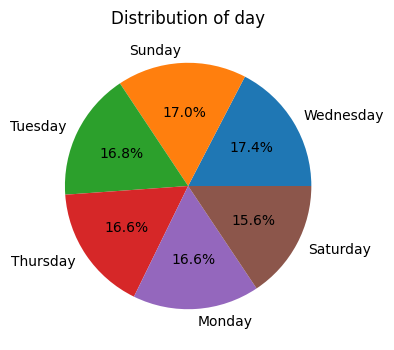

In [ ]:
data_df['day'].value_counts().plot(kind='pie', figsize=(4, 4), autopct='%1.1f%%')
plt.title('Distribution of day')
plt.ylabel('')
plt.show()

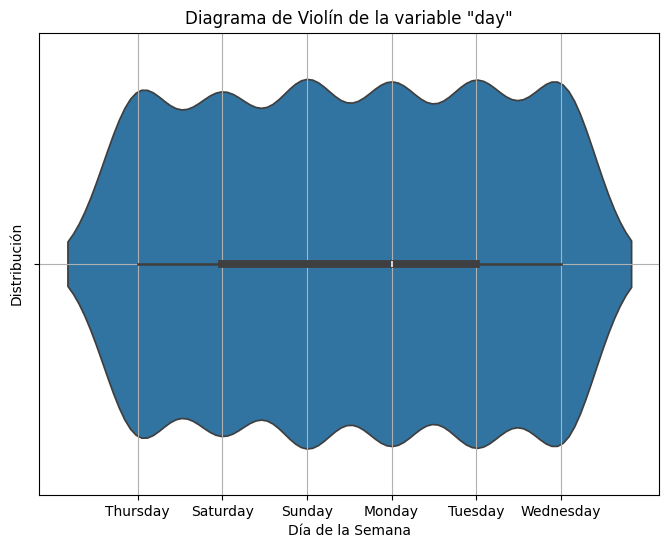

  Día de la Semana  Frecuencia
0        Wednesday         208
1           Sunday         203
2          Tuesday         201
3         Thursday         199
4           Monday         199
5         Saturday         187


<ipython-input-59-057de800feb7>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='day', data=data_df, palette='viridis', order = data_df['day'].value_counts().index)


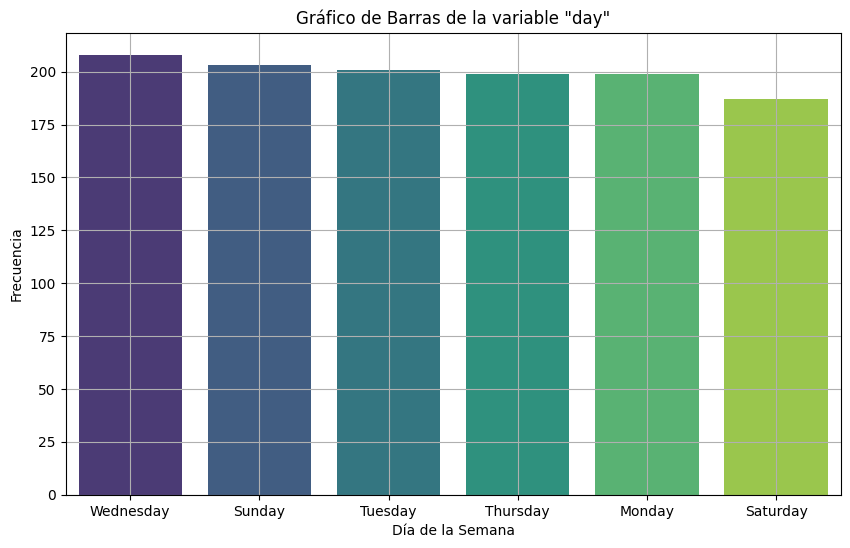

In [ ]:
# Diagrama de Violín de la variable 'day'
plt.figure(figsize=(8, 6))
sns.violinplot(x='day', data=data_df)
plt.title('Diagrama de Violín de la variable "day"')
plt.xlabel('Día de la Semana')
plt.ylabel('Distribución')
plt.grid(True)
plt.show()

# Tabla de Frecuencia de la variable 'day'
day_frequency_table = data_df['day'].value_counts().reset_index()
day_frequency_table.columns = ['Día de la Semana', 'Frecuencia']
print(day_frequency_table)

# Gráfico de Barras de la variable 'day'
plt.figure(figsize=(10, 6))
sns.countplot(x='day', data=data_df, palette='viridis', order = data_df['day'].value_counts().index)
plt.title('Gráfico de Barras de la variable "day"')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

In [ ]:
unique_categories = data_df['day'].unique()
unique_categories.shape[0]

6

### 3.3 Búsqueda de relaciones con la variable objetivo



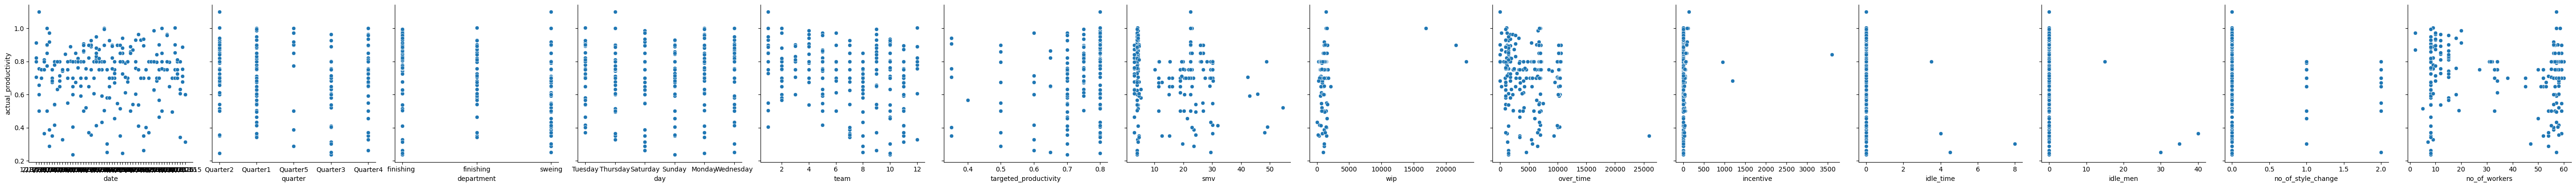

In [16]:
sns.pairplot(data_df.sample(frac=0.2), height=4, y_vars="actual_productivity", x_vars=features, kind="scatter")

##### 3.4.1 Caja y bigotes
Se busca visualizar altas correlaciones entre las variables categóricas de entrada y la variable objetivo.

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/953132811.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


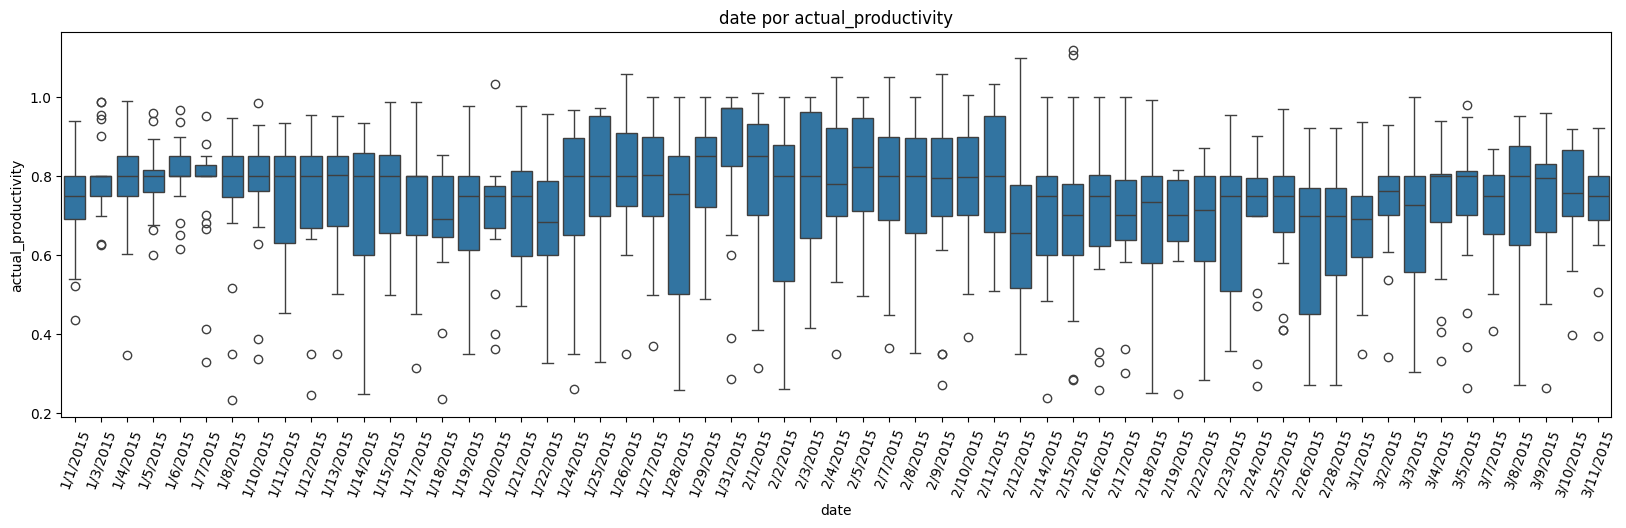

In [24]:
fig = plt.figure(figsize=(20, 5))
ax = sns.boxplot(x = 'date', y = 'actual_productivity', data = data_df)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('date por actual_productivity')
plt.xlabel('date')
plt.ylabel('actual_productivity')
plt.show()

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/2171125575.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


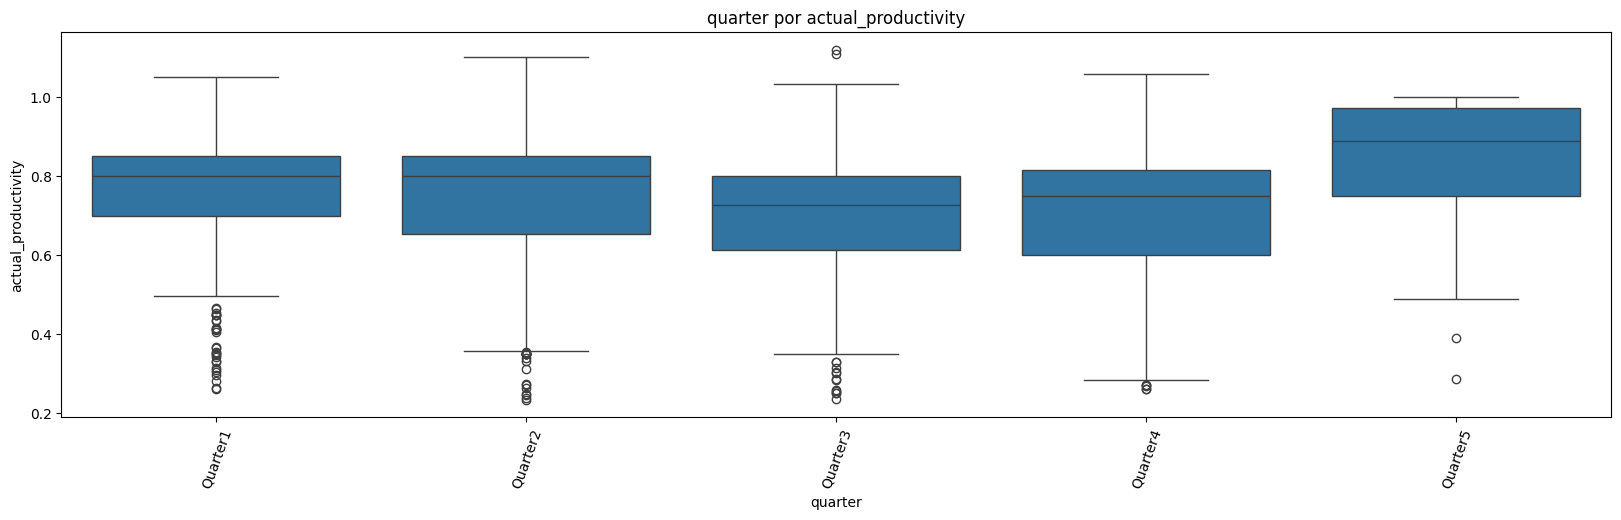

In [25]:
fig = plt.figure(figsize=(20, 5))
ax = sns.boxplot(x = 'quarter', y = 'actual_productivity', data = data_df)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('quarter por actual_productivity')
plt.xlabel('quarter')
plt.ylabel('actual_productivity')
plt.show()

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/3426429757.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


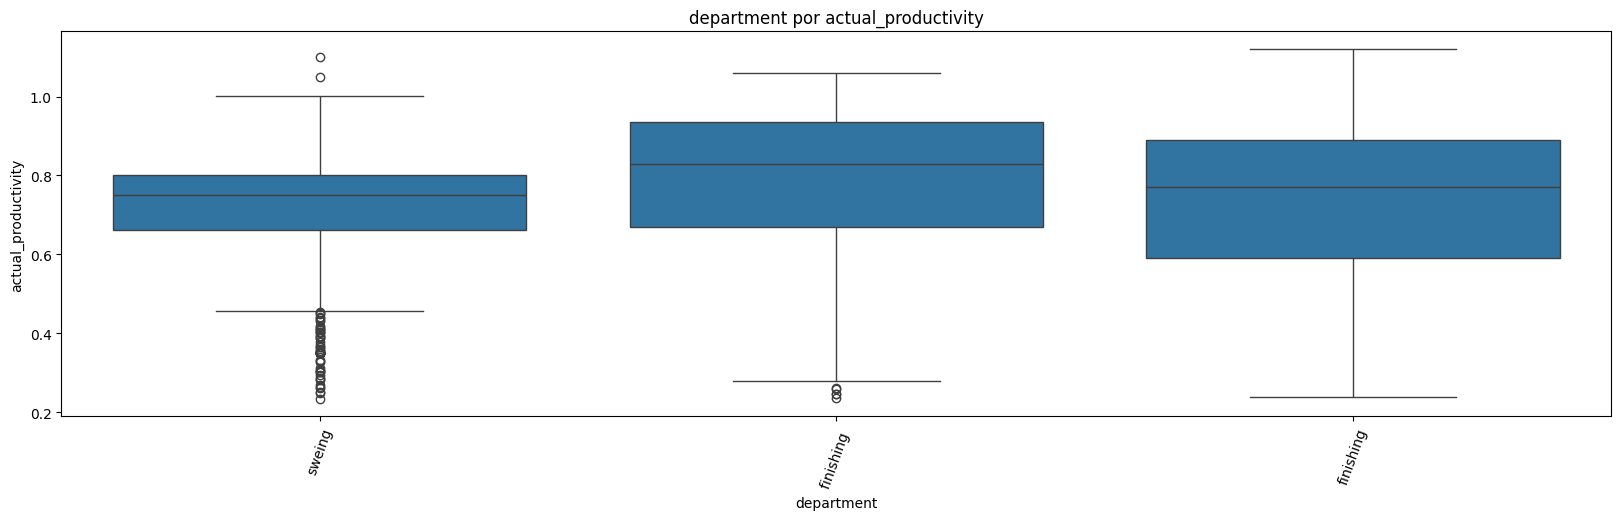

In [26]:
fig = plt.figure(figsize=(20, 5))
ax = sns.boxplot(x = 'department', y = 'actual_productivity', data = data_df)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('department por actual_productivity')
plt.xlabel('department')
plt.ylabel('actual_productivity')
plt.show()

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/2755451951.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


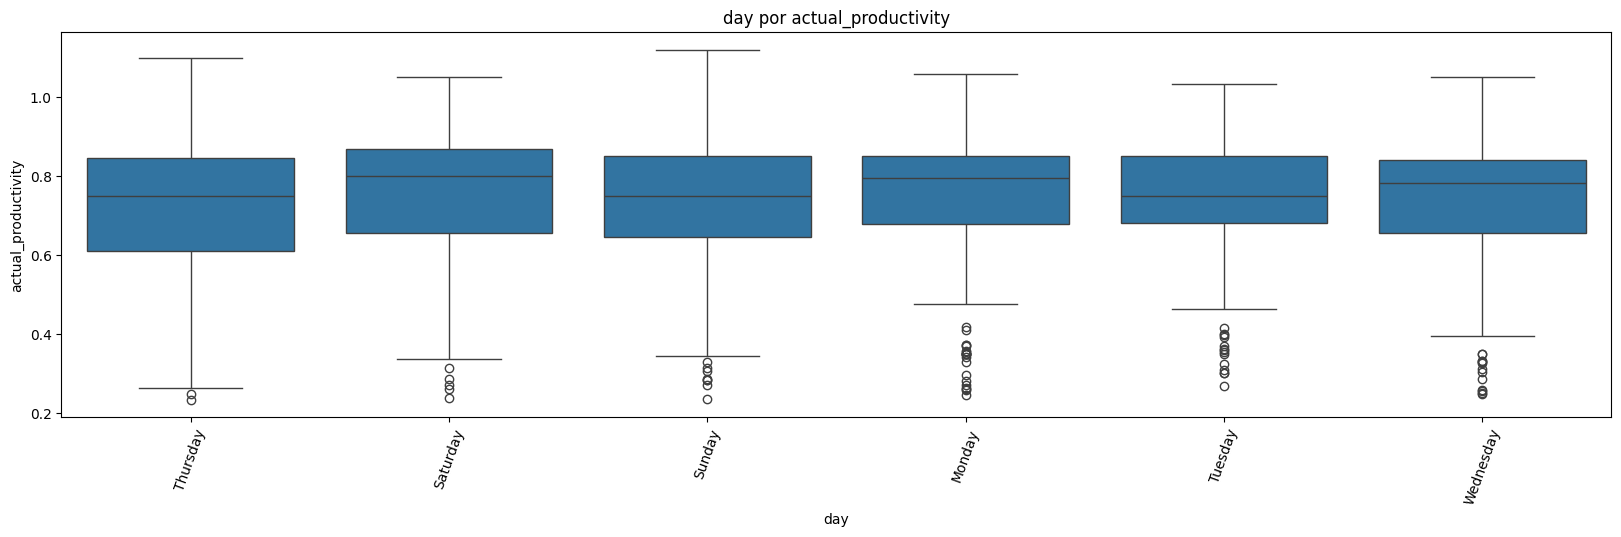

In [27]:
fig = plt.figure(figsize=(20, 5))
ax = sns.boxplot(x = 'day', y = 'actual_productivity', data = data_df)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('day por actual_productivity')
plt.xlabel('day')
plt.ylabel('actual_productivity')
plt.show()

/var/folders/0_/th2rpmh97_l2bfdwmjhwgng00000gn/T/ipykernel_4733/2545210843.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)


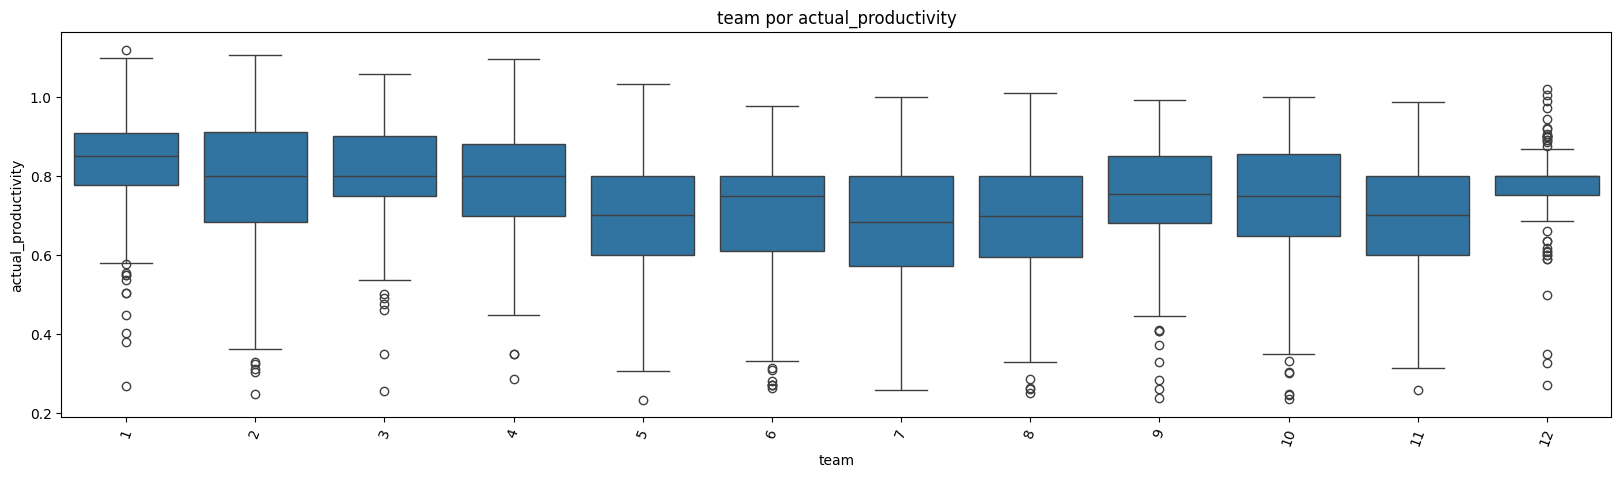

In [35]:
fig = plt.figure(figsize=(20, 5))
ax = sns.boxplot(x = 'team', y = 'actual_productivity', data = data_df)
d = ax.set_xticklabels(ax.get_xticklabels(), rotation = 70)
plt.title('team por actual_productivity')
plt.xlabel('team')
plt.ylabel('actual_productivity')
plt.show()

##### 3.4.2 Búsqueda de relaciones entre las variables de entrada


Correlaciones variables numéricas

In [39]:
features_numericas= ['no_of_workers', 'no_of_style_change', 'targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'idle_men', 'actual_productivity']

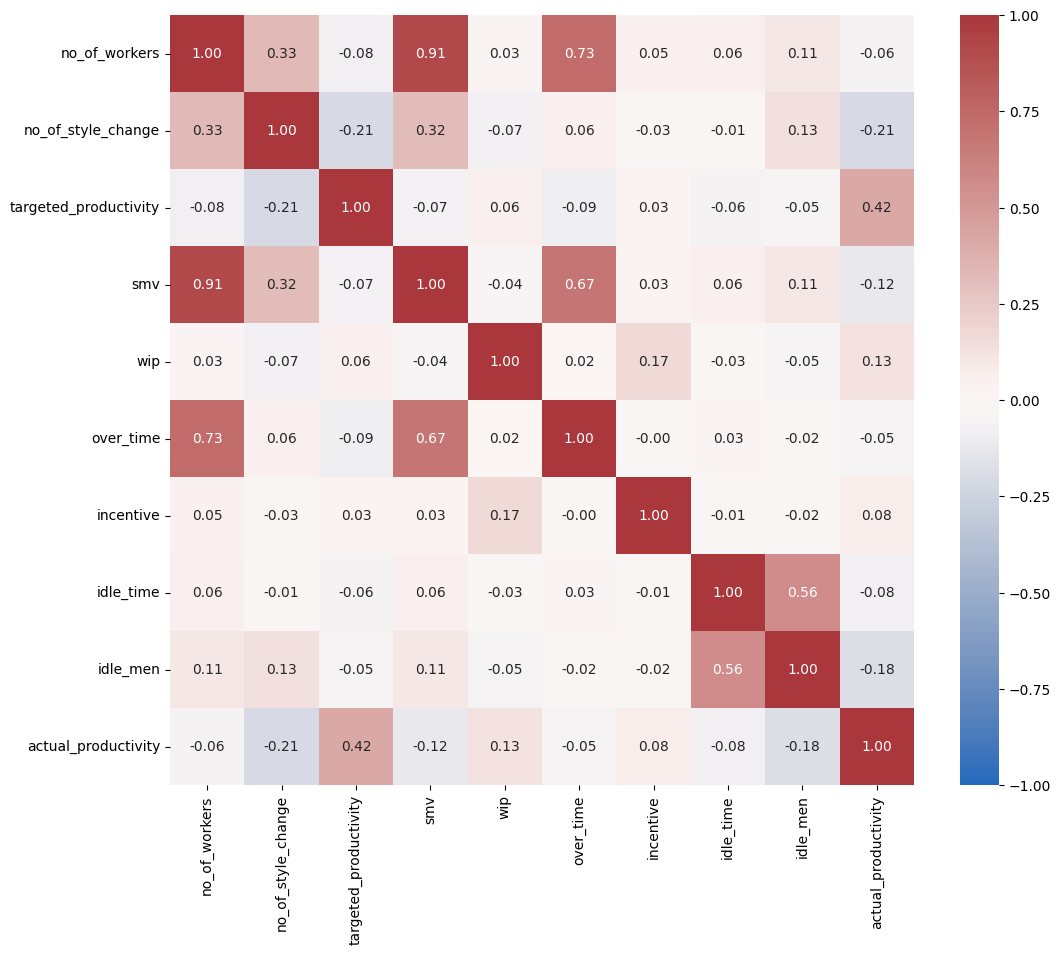

In [40]:
correlation_matrix = data_df[features_numericas].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='vlag', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.show()

### 3.4 Preparación de datos: Arreglo nulos y Datos atipicos

## Tarea 4: Modelamiento

### 4.1 Particionamiento del conjunto de datos en entrenamiento y prueba

Se desea construir un modelo que se ajuste bien a los datos de entrenamiento, pero que además se comporte de forma similar con datos previamente desconocidos.
Metodológicamente, una práctica común para validar esto es separando el conjunto de datos etiquetado en dos partes: entrenamiento y prueba. La proporción reservada para probar el modelo es definida por el analista, pero un valor común es 30%.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(data_df[features], data_df["actual_productivity"], test_size=0.3, random_state=1)

In [10]:
X_train.shape, y_train.shape

((837, 14), (837,))

In [11]:
X_test.shape, y_test.shape

((360, 14), (360,))

### 4.2 Entrenamiento de un primer modelo de regresión lineal

Se dice que la regresión es lineal dado que se asume una relación lineal entre las variables de entrada (features) y la variable objetivo (target).
En Scikit-Learn existen varias formas de implementar el algoritmo de regresión lieal, pero dado que el objetivo de esta practica esta enfocado en el análisis del modelo resultante y no tanto del algoritmo o del proceso de entrenamiento, se utilizará la implementación más sencilla dada por la clase LinearRegression.

In [12]:
regression = LinearRegression()

In [13]:
regression.fit(X_train, y_train)

ValueError: could not convert string to float: '1/19/2015'

In [14]:
##Interpretación de los coeficientes y del intercepto
#Los coeficientes de la regresión brindan una intuición del impacto o la fuerza de una variable de entrada en la predicción/estimación de la variable objetivo.
pd.DataFrame({"columns": features, "coef": regression.coef_})

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
regression.intercept_

In [ ]:
f, axs = plt.subplots(1, len(features), sharey=True, figsize=(20, 4))

for i in range(len(features)):
    col = features[i]
    x = X_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, "o", alpha=0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)

In [ ]:
# Dado que `Diameter` se encuentra en el rango de 0 a 1, se simula un cambio de 0.1 múltiples veces para un mismo registro
# Siendo el incremento de apenas 1/10 de unidad, se espera un cambio en la estimación de la variable objetivo de ~0.57%
df = pd.concat([crabs_df[features].iloc[0:1]] * 5).reset_index()
df["Diameter"] = df["Diameter"] + (df.index / 10)
df["prediction"] = regression.predict(df[features])
df["% change"] = df["prediction"].diff()
df

In [ ]:
#Validación (evaluación) del modelo
#La forma más básica para saber que tan bien se comporta el modelo es midiendo que tanto se alejan las estimaciones o predicciones del mismo respecto a la variable objetivo real. Esta medición se puede hacer tanto para el conjunto de datos de entrenamiento como para el de prueba.


**Mean Absolute Error (MAE)**

$$ MAE = {1 \over n}{\sum_{i=1}^n {|y_{i} - y_{i}'|} } $$

In [ ]:
print("Train:", mean_absolute_error(y_train, regression.predict(X_train)))
print("Test:", mean_absolute_error(y_test, regression.predict(X_test)))

**Root Mean Squeared Error (RMSE)**

$$ RMSE = {1 \over n}{\sum_{i=1}^n {(y_{i} - y_{i}')^2} } $$

In [ ]:
print("Train:", np.sqrt(mean_squared_error(y_train, regression.predict(X_train))))
print("Test:", np.sqrt(mean_squared_error(y_test, regression.predict(X_test))))

**Análisis del error**

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=y_test, showmeans=True, orient="h")
plt.title("Valor real de $\t{Age}$ en el conjunto de prueba")
plt.grid()
plt.show()

In [ ]:
y_test.describe(percentiles=[0.25, 0.5, 0.75, 0.99])

In [ ]:
plt.figure(figsize=(20, 3))
sns.boxplot(x=abs(y_test - regression.predict(X_test)), showmeans=True, orient="h")
plt.title("|Valor real - Valor estimado| de $\t{Age}$")
plt.xlabel("Error")
plt.grid()
plt.show()

In [ ]:
abs(y_test-regression.predict(X_test)).describe(percentiles=[0.25, 0.5, 0.75, 0.95, 0.99])

### 4.3 Entrenamiento de un segundo modelo aplicando normalización

### 4.4 Validación de los supuestos de la regresión

##### 4.4.1 Colinealidad

##### 4.4.1 Linealidad

##### 4.4.1 Normalidad de los errores

##### 4.4.1 Varianza constante (Homocedasticidad)